<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 · Sección 3 — *Ejercicios*

Resolver los enunciados de la sección 3 del PDF de la Clase 1,


1.Carga el conjunto de datos Iris usando el m ́odulo csv presentado anteri-
ormente.

Datos: 150

= Estadísticas todas las flores =
Característica      Media         σ
sepal_length       5.8433    0.8253
sepal_width        3.0540    0.4321
petal_length       3.7587    1.7585
petal_width        1.1987    0.7606

= Estadísticas por especie =
Especie           Característica      Media         σ
Iris-setosa       sepal_length       5.0060    0.3489
Iris-setosa       sepal_width        3.4180    0.3772
Iris-setosa       petal_length       1.4640    0.1718
Iris-setosa       petal_width        0.2440    0.1061
Iris-versicolor   sepal_length       5.9360    0.5110
Iris-versicolor   sepal_width        2.7700    0.3106
Iris-versicolor   petal_length       4.2600    0.4652
Iris-versicolor   petal_width        1.3260    0.1958
Iris-virginica    sepal_length       6.5880    0.6295
Iris-virginica    sepal_width        2.9740    0.3193
Iris-virginica    petal_length       5.5520    0.5463
Iris-virginica    petal_width        2.0260    0.2719


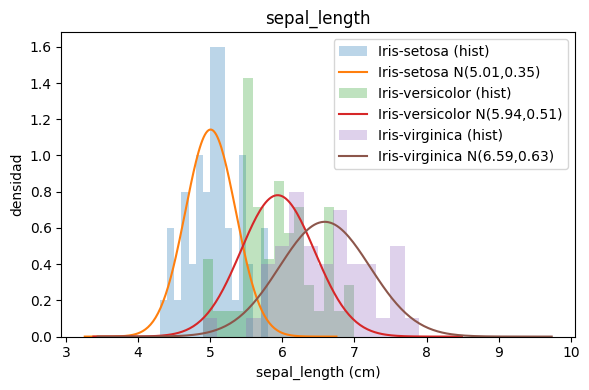

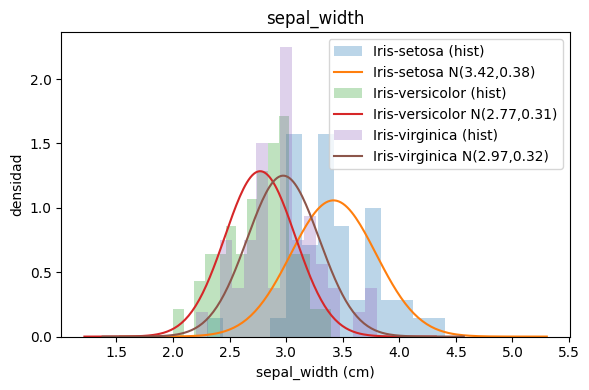

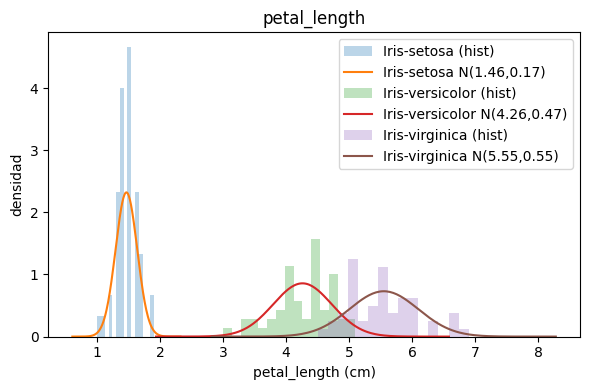

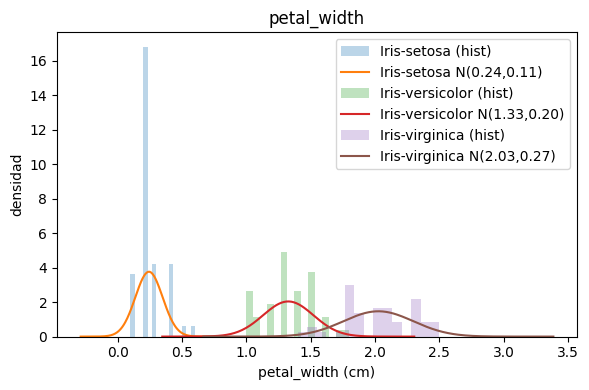

In [ ]:
import csv, math
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar csv
caracs   = ["sepal_length","sepal_width","petal_length","petal_width"]
especies = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

datos = []
with open("iris.data", "r") as f:
    reader = csv.reader(f)
    for cols in reader:
      #saltar líneas incompletas
        if len(cols) < 5:
            continue
        datos.append({
            "sepal_length": float(cols[0]),
            "sepal_width":  float(cols[1]),
            "petal_length": float(cols[2]),
            "petal_width":  float(cols[3]),
            "species":      cols[4]
        })

print("Datos:", len(datos))

# 2) Funciones
def media(datos):
    n = 0
    for k in datos:
        n = n + 1
    suma = 0.0
    i = 0
    while i < n:
        valor_actual = float(datos[i])
        suma = suma + valor_actual
        i = i + 1
    resultado = suma / n
    return resultado

def desv_estandar(datos):
    n = 0
    for k in datos:
        n = n + 1
    mu = media(datos)
    suma_cuadrados = 0.0
    i = 0
    while i < n:
        valor_actual = float(datos[i])
        diferencia   = valor_actual - mu
        cuadrado     = diferencia * diferencia
        suma_cuadrados = suma_cuadrados + cuadrado
        i = i + 1
    varianza = suma_cuadrados / n
    sigma = math.sqrt(varianza)
    return sigma

# 3) Vectores globales y por especie
# Para cada característica m de todas las flores
X_all = {}
for m in caracs:
    valores_m = []
    for d in datos:
        valores_m.append(d[m])
    X_all[m] = valores_m

# X_sp diccionario especie-característica-lista de valores
X_sp = {}
for sp in especies:
    X_sp[sp] = {}
    for m in caracs:
        X_sp[sp][m] = []

# Rellenar X_sp con los datos
for d in datos:
    sp = d["species"]
    for m in caracs:
        X_sp[sp][m].append(d[m])

# 4) Estadísticos globales
print("\n= Estadísticas todas las flores =")
print(f"{'Característica':<15} {'Media':>9} {'σ':>9}")
for m in caracs:
    u, s = media(X_all[m]), desv_estandar(X_all[m])
    print(f"{m:<15} {u:>9.4f} {s:>9.4f}")
#De las cuatro mediciones analizadas,
#la más característica para distinguir entre las tres especies es el
#ancho del pétalo (petal width), ya que muestra una separación clara
#en comparación a las otras mediciones
#y casi sin traslapes entre los grupos, por ejemplo en Iris-setosa los pétalos de media
#son muy estrechos (0.24 cm), en Iris-versicolor son intermedios (1.33 cm)
# y en Iris-virginica son más anchos (2.03 cm).
#En contraste, las medidas de sépalos presentan una
#gran superposición entre especies y la longitud del pétalo,
#aunque también podria ser funcional, es mejor la de petal width,pues esta última
#tiene cierto solapamiento entre versicolor y virginica
#por ello el ancho del pétalo sería la opción más confiable.

# 5) Estadística por especie
print("\n= Estadísticas por especie =")
print(f"{'Especie':<17} {'Característica':<15} {'Media':>9} {'σ':>9}")
for sp in especies:
    for m in caracs:
        u, s = media(X_sp[sp][m]), desv_estandar(X_sp[sp][m])
        print(f"{sp:<17} {m:<15} {u:>9.4f} {s:>9.4f}")

# 6–8) Histogramas de densidad + Normal(u,σ) por especie, para cada característica
def normal_pdf(x, u, s):
    if s <= 0:
        return np.zeros_like(x)
    return (1.0/(s*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - u)/s)**2)

for m in caracs:
    plt.figure(figsize=(6,4))
    for sp in especies:
        vals = np.array(X_sp[sp][m], dtype=float)
        # histograma de densidad
        plt.hist(vals, bins=15, density=True, alpha=0.3, label=f"{sp} (hist)")
        # curva normal con nuestras u,σ
        u, s = media(vals.tolist()), desv_estandar(vals.tolist())
        x = np.linspace(u - 5*s, u + 5*s, 200)
        plt.plot(x, normal_pdf(x, u, s), label=f"{sp} N({u:.2f},{s:.2f})")
    plt.title(m)
    plt.xlabel(f"{m} (cm)")
    plt.ylabel("densidad")
    plt.legend()
    plt.tight_layout()
    plt.show()
